In [1]:
import torch
from monai.networks.layers import Norm
from monai.networks.nets import UNet
from cspoco.utils.plot import plot_projections
from cspoco.utils.predict import predict

In [2]:
input_dir = 'data/semantic_3D/test/img'
output_dir = 'predictions/test'
model_path = 'model_test/glamorous-bush-3/best_model.pth'

batch_size = 4
roi_size = (16, 64, 64)

### Setup model

In [3]:
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
)

model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### Predict

In [4]:
image, predicted = predict(input_dir, output_dir, model, roi_size=roi_size, return_last=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.30it/s]


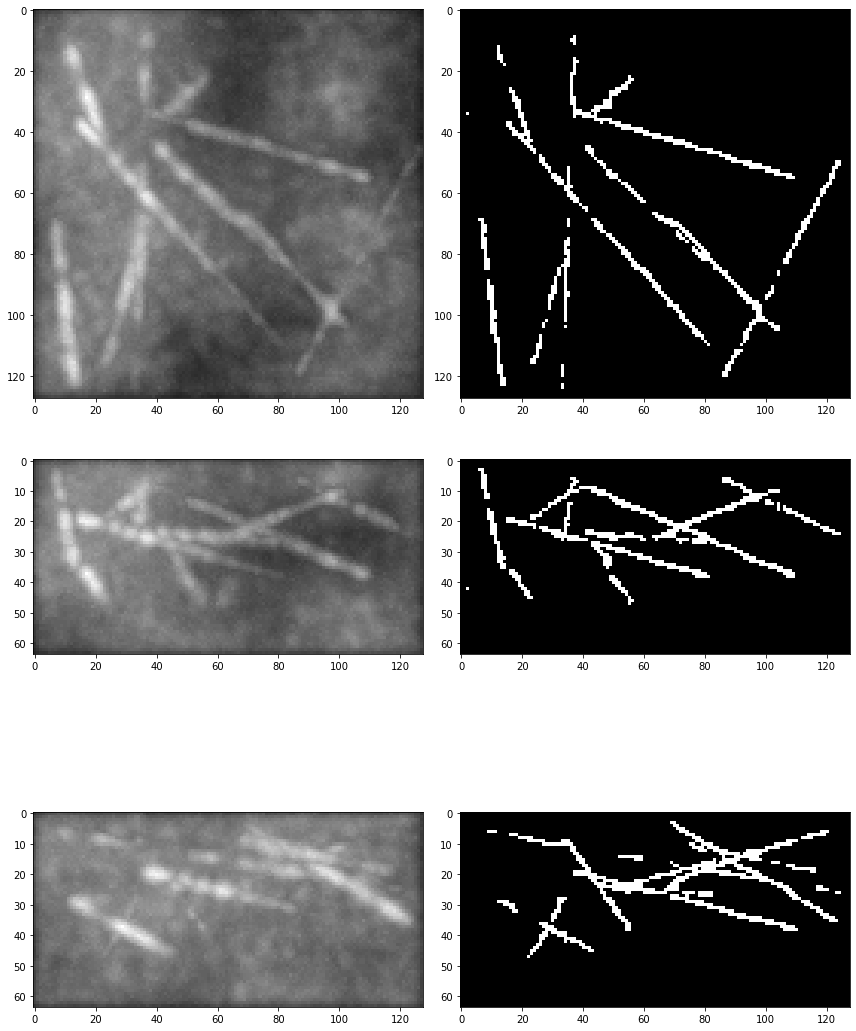

In [5]:
plot_projections([image, predicted], panel_size=6)